## A.I. Assignment 6 Building Classification Models With Pytorch

## Learning Goals

First we assume a basic understanding of and suggest recommendations for:
    * Python
    * Numpy (https://github.com/keineahnung2345/Deep-Learning-Andrew-Ng/blob/master/Course1-Neural%20Networks%20and%20Deep%20Learning/Week2%20-%20Neural%20Networks%20Basics/Python+Basics+With+Numpy+v3.ipynb)
    * Torch (https://www.learnpytorch.io/00_pytorch_fundamentals/)
    * Neural Networks Fundamentals (https://cs231n.github.io/neural-networks-1/)
    * Linear Algebra and Gradients Intuitions (https://www.youtube.com/watch?v=IHZwWFHWa-w&t=8s)

We will use this concepts for everything we do from now on.

By the end of this lab, you should be able to:


### Task

* Standard Pytorch Worflow
* Deep Dive in Linear Classification
* Go through the recap of a linear model/simple models
* Build a simple classsifier on non liniar data with a liniar model (first attempt)
* Build a simple classsifier using non liniar activation function
* Build a multiclass classifier

This one will be more intense and all 9 exercises are 1 point each.


## Standard Pytorch Workflow When Takling a task

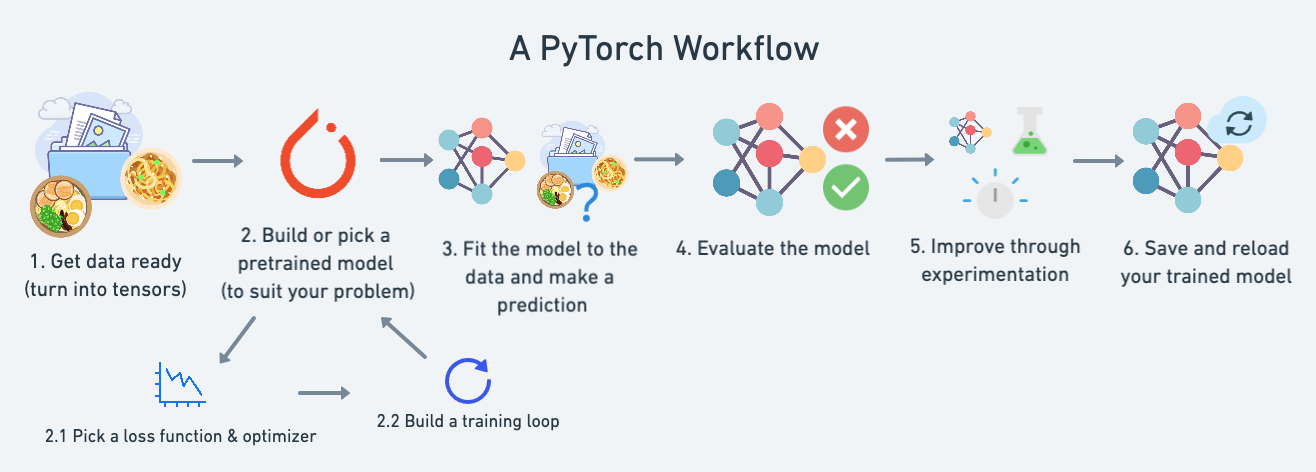
Source : https://www.learnpytorch.io/01_pytorch_workflow/

1 **Prepare your data** by loading the dataset and transforming it into a format that can be used for training and testing your model. This may include data cleaning, splitting the data into training and validation sets, and applying any necessary data augmentation techniques.

2 **Define your model architecture** using PyTorch's neural network modules. This involves creating the layers of your model, specifying their sizes and activation functions, and connecting them together.

 * 2.1 **Choose an optimizer** and a loss function for your model. The optimizer determines how the model's weights are updated during training, while the loss function measures how well the model is performing on the training data.

* 2.2 **Develop a training loop** that iterates over your training data in batches, applies the model to each batch, calculates the loss, and updates the model's weights using the optimizer.

3 **Evaluate your model's performance** on the validation set. This involves applying the model to the validation data, calculating the model's predictions, and comparing them to the actual labels.

4 **Make any necessary adjustments** to your model, such as changing the optimizer, adding regularization, or adjusting the learning rate, and retrain the model if necessary.

Once your model is trained and validated, use it to make predictions on new data.

5 Finally, **save your trained model** for later use or deployment in a production environment.

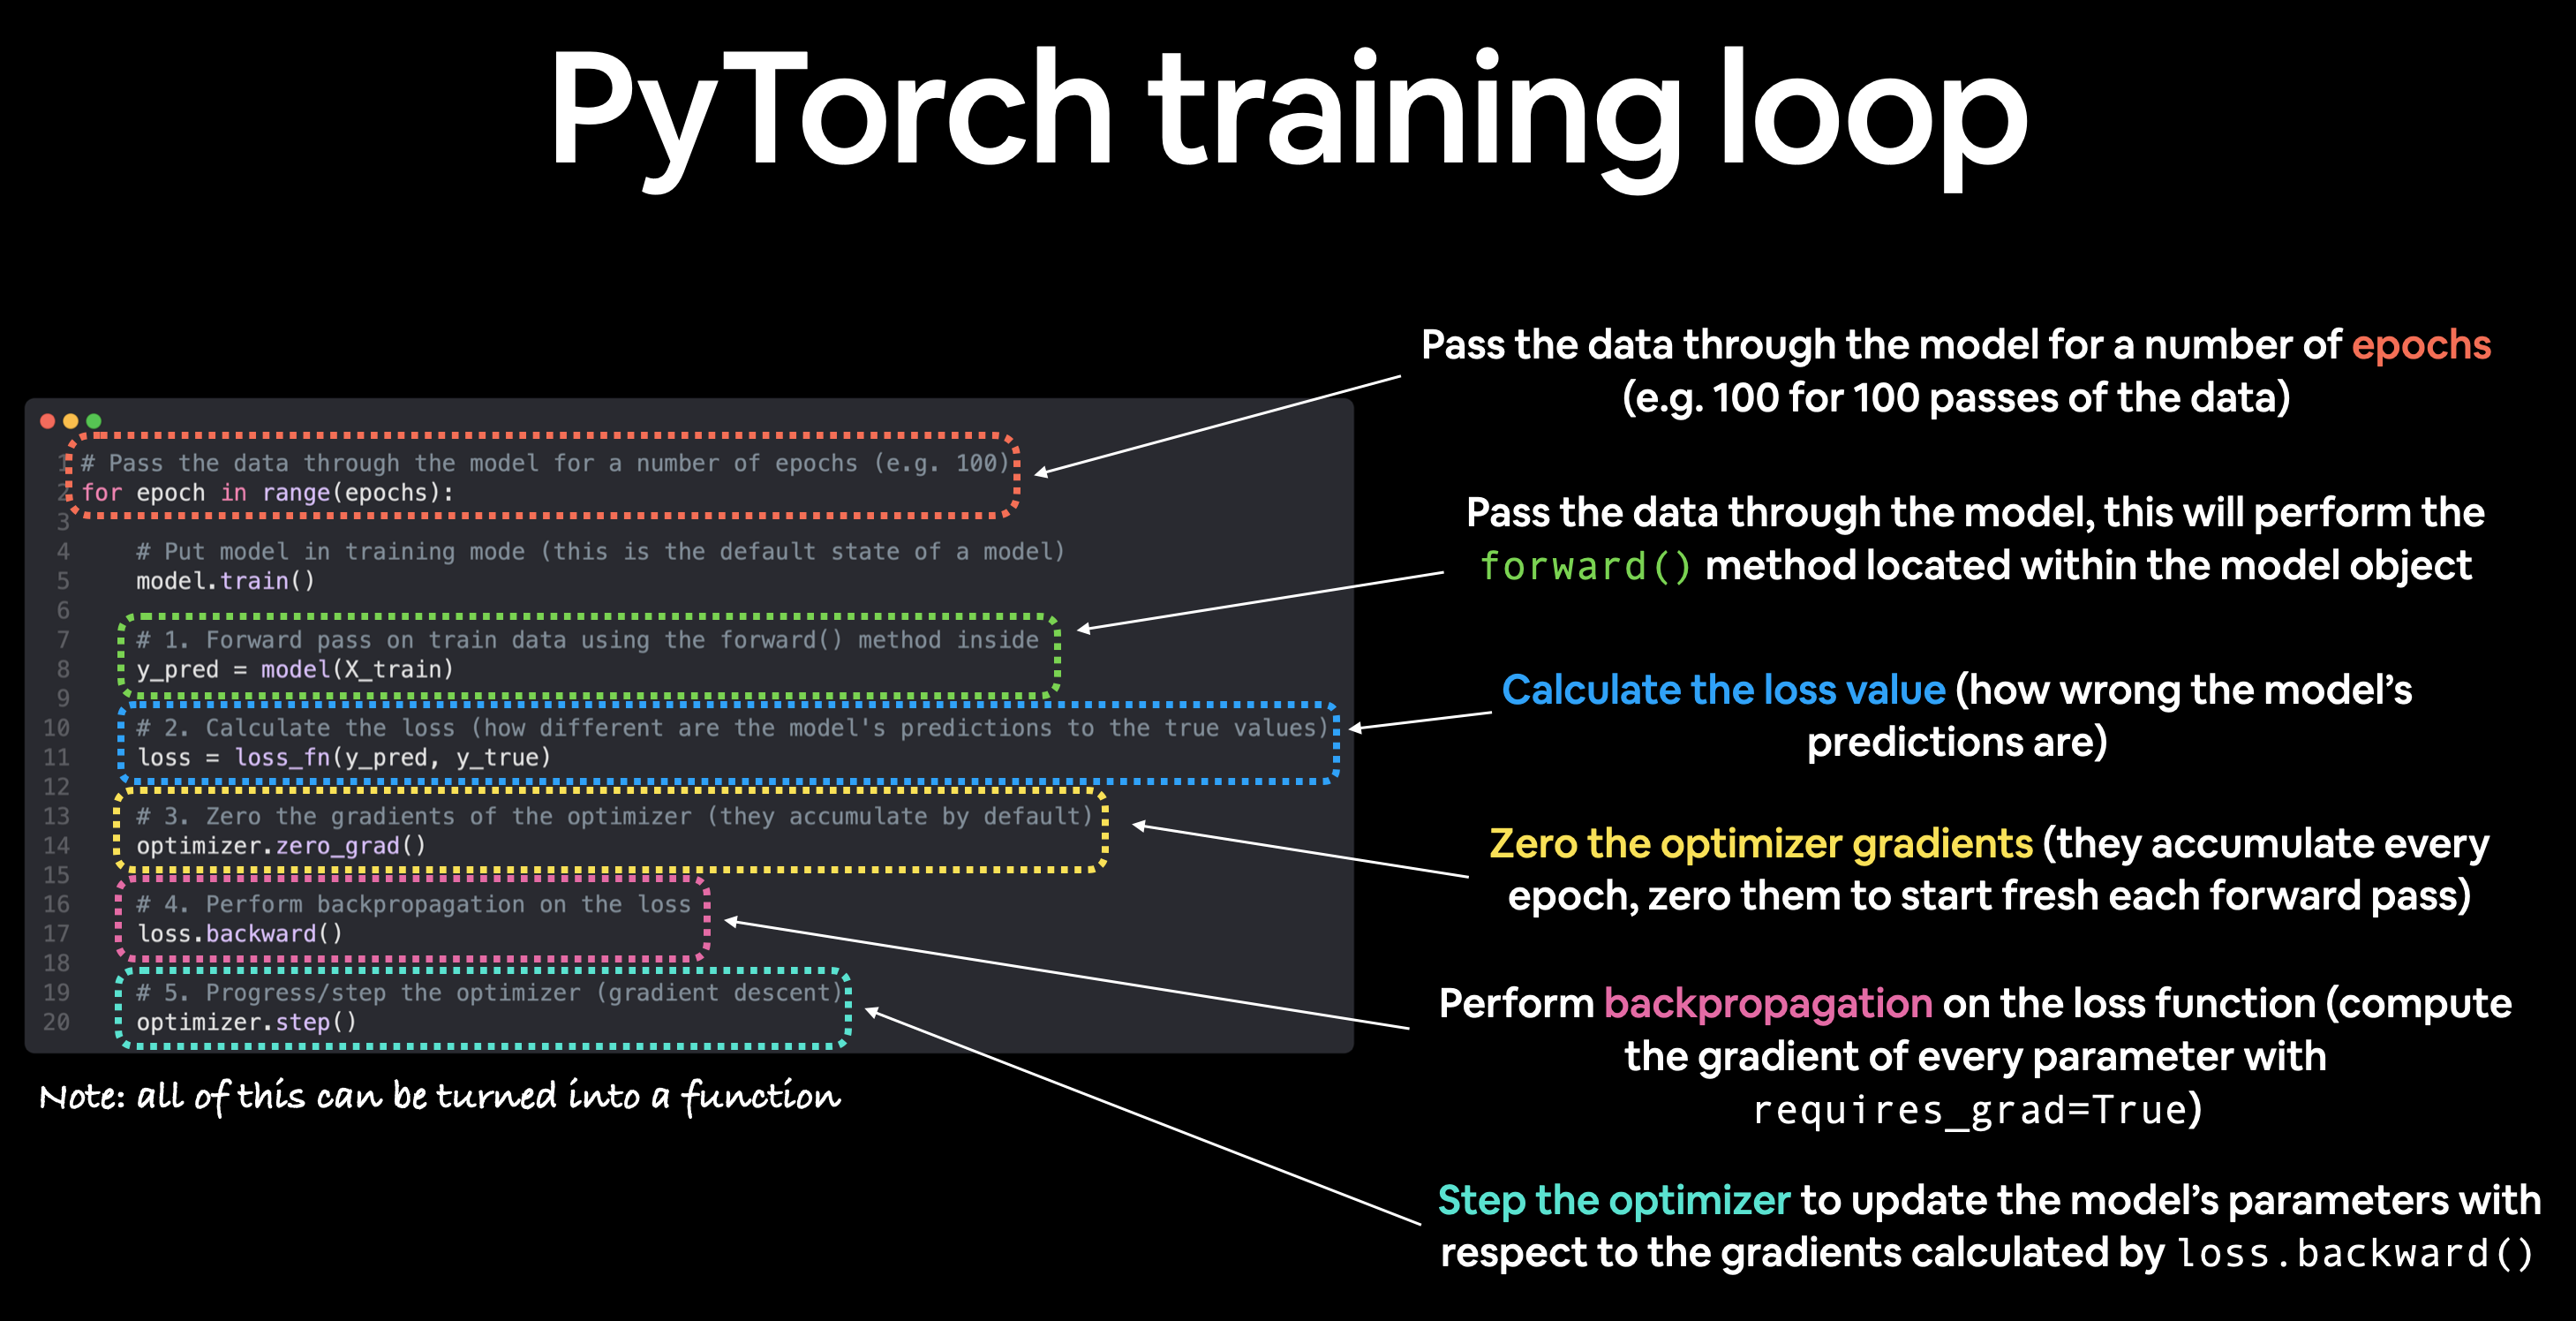!

## Understanding various ML Problems



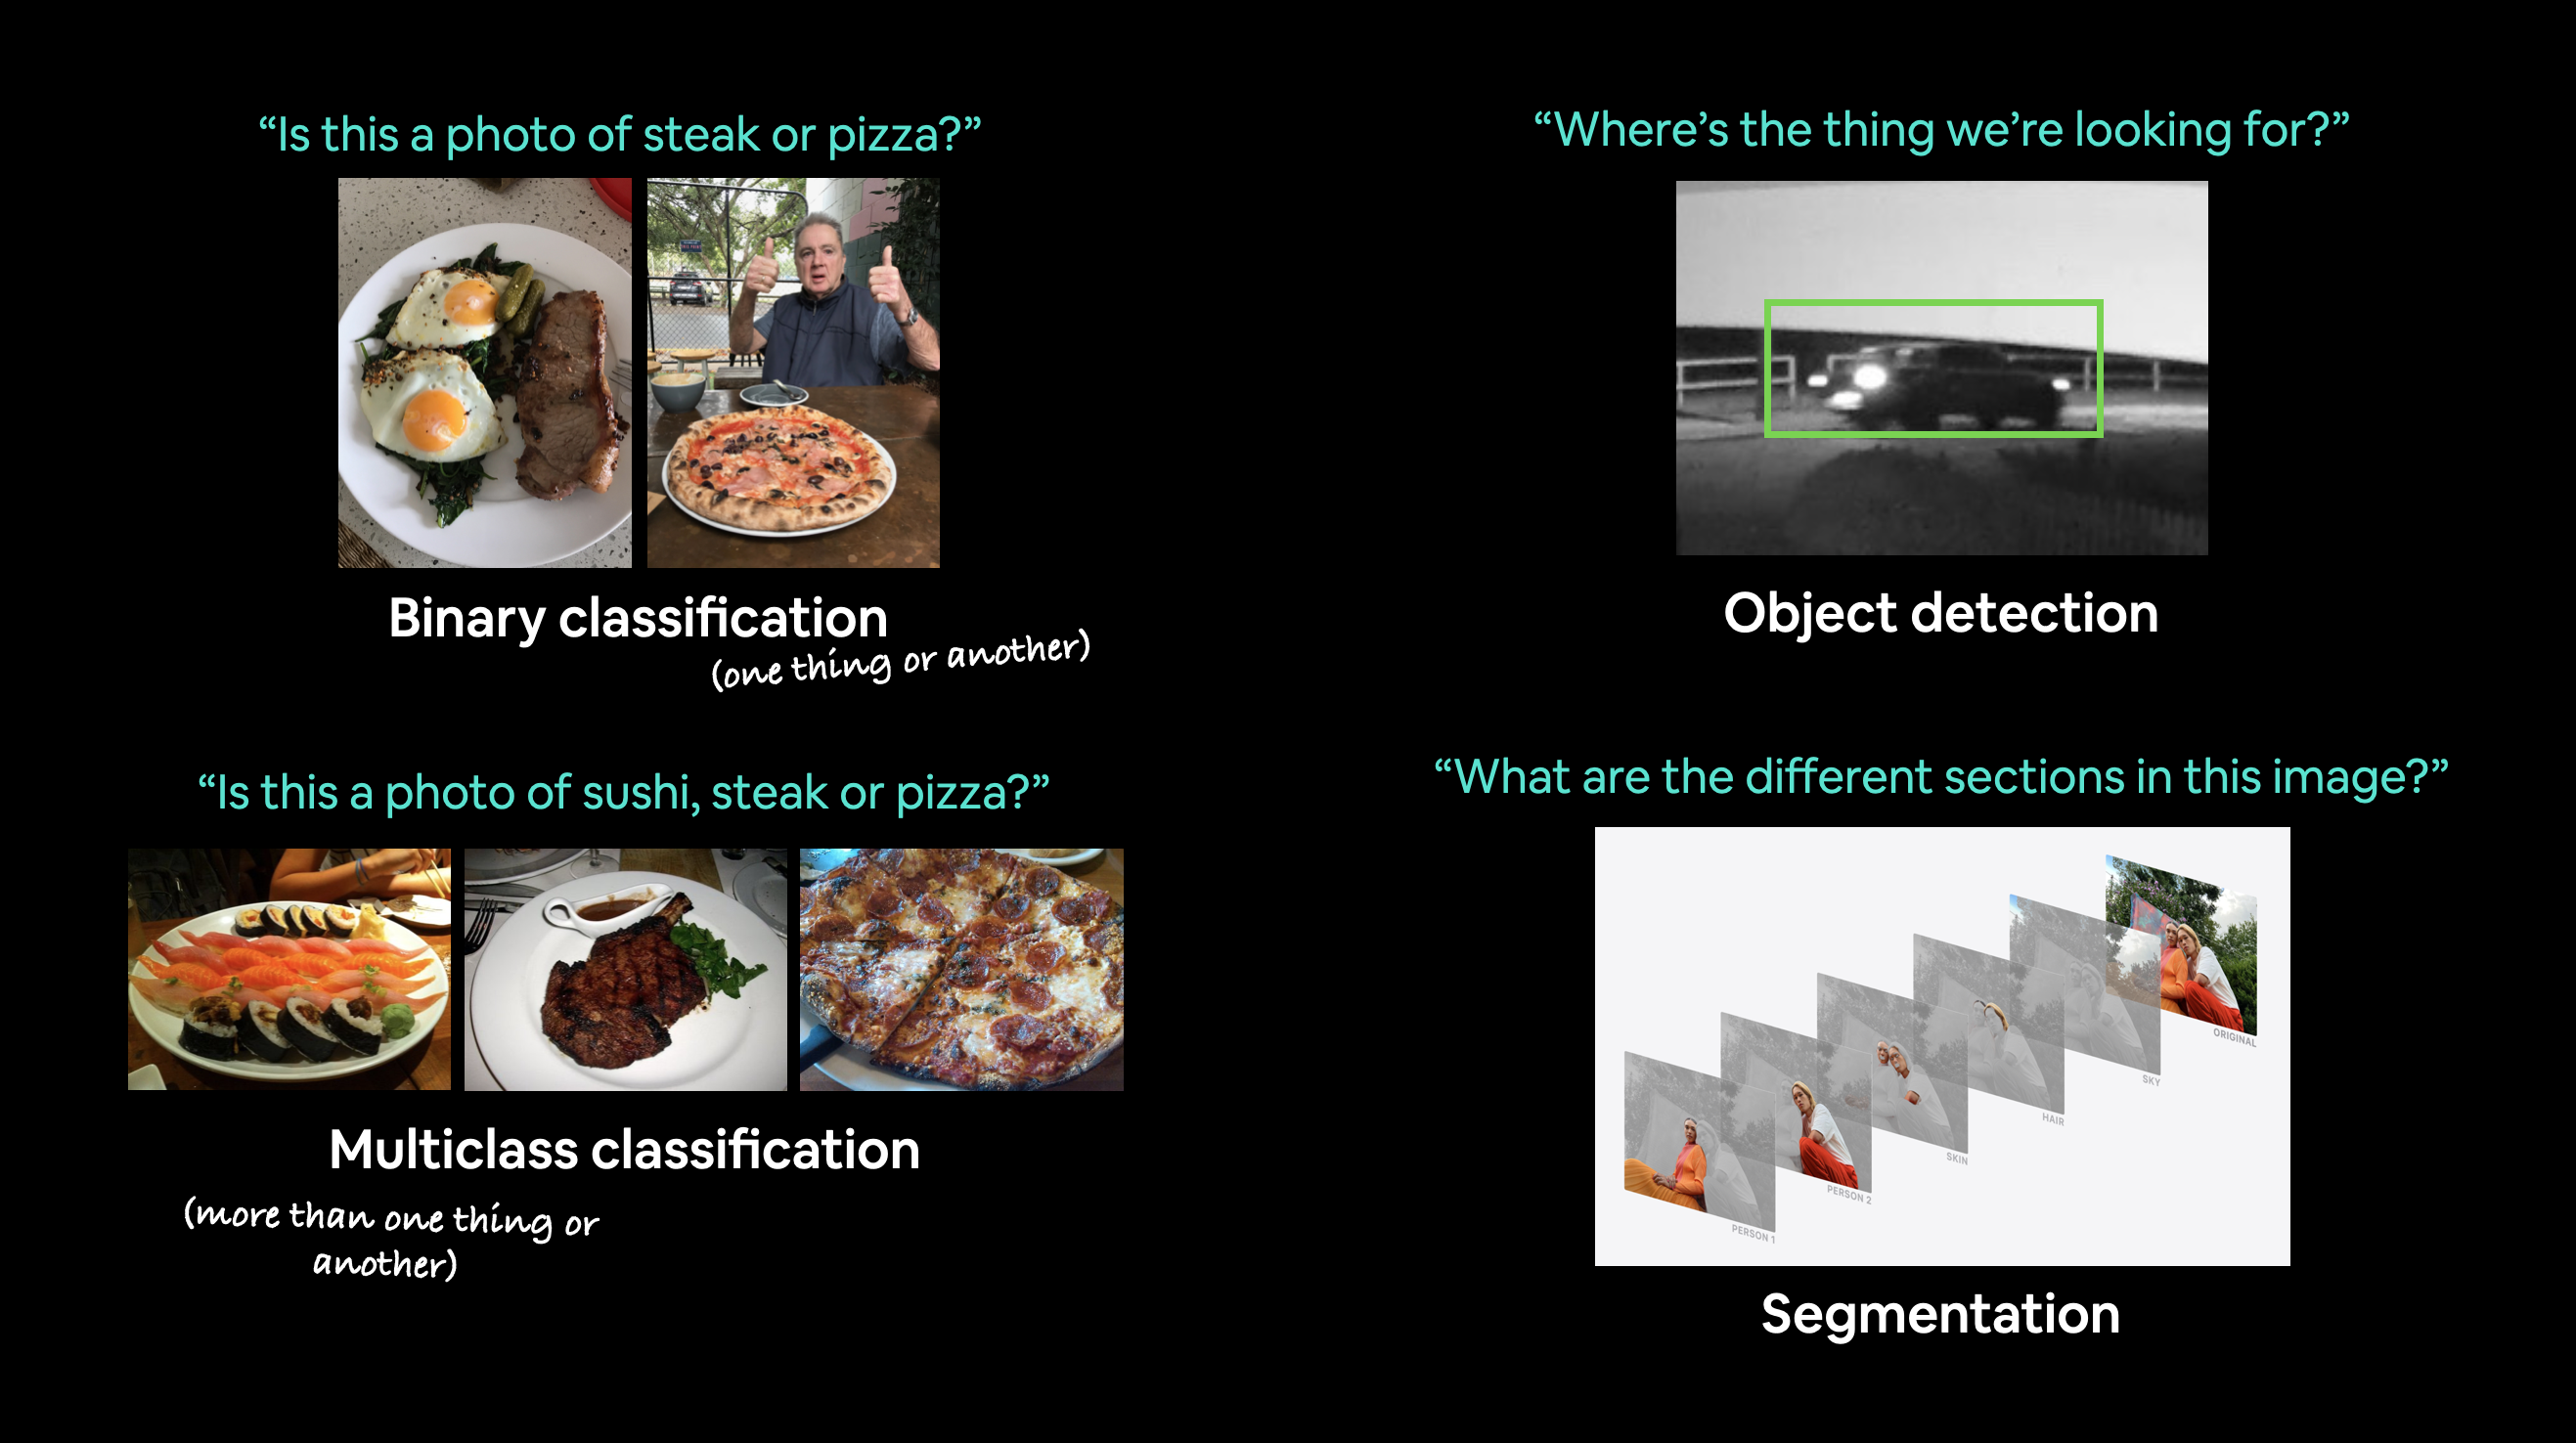!roblem type	What is it?	Example
Binary classification	Target can be one of two options, e.g. yes or no	Predict whether or not someone has heart disease based on their health parameters.
Multi-class classification	Target can be one of more than two options	Decide whether a photo of is of food, a person or a dog.
Multi-label classification	Target can be assigned more than one option	Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy).

Source : https://www.learnpytorch.io/01_pytorch_workflow/

| Problem type              | What is it?                                                      | Example                                                                    |
| ------------------------ | ---------------------------------------------------------------- | -------------------------------------------------------------------------- |
| Binary classification     | Target can be one of two options, e.g. yes or no                 | Predict whether or not someone has heart disease based on their health parameters. |
| Multi-class classification| Target can be one of more than two options                       | Decide whether a photo is of food, a person or a dog.                       |
| Multi-label classification| Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy).  

Today we will be looking into binary classification and touch upon multiclass classification

## To better understand simple neural netowrks check out:
https://playground.tensorflow.org/

It has the circle data we are going to use now

## Small Recap 

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.1'

### Are we using a GPU ?

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


## Let's look at the perceptron from lab 04 as an example for all the steps

As a reminder here we are making a neural network that acts like an OR gate

#### 1 Prepare Data

In [3]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [4]:
if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")

The shapes of our data match !


#### 2 Define Model

Firstly, the code defines a subclass of nn.Module, which is a superclass that almost all PyTorch models inherit from.

The class constructor creates two nn.Linear layers with the capacity to handle the input and output shapes of the input features X and target labels y.

Next, the forward() method is defined, which contains the computations for the forward pass of the model.

Finally, an instance of the model class is created and sent to the designated device for computation.

In [5]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x


In [6]:
# Example usage:
model = Perceptron(2, 1)

#### 2.1 Chose appropriate optimizer

In [7]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

#### 2.2 Create Training Loop

In [8]:
num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.3727
Epoch [200/4000], Loss: 0.2630
Epoch [300/4000], Loss: 0.2059
Epoch [400/4000], Loss: 0.1697
Epoch [500/4000], Loss: 0.1443
Epoch [600/4000], Loss: 0.1254
Epoch [700/4000], Loss: 0.1109
Epoch [800/4000], Loss: 0.0992
Epoch [900/4000], Loss: 0.0898
Epoch [1000/4000], Loss: 0.0819
Epoch [1100/4000], Loss: 0.0753
Epoch [1200/4000], Loss: 0.0696
Epoch [1300/4000], Loss: 0.0647
Epoch [1400/4000], Loss: 0.0604
Epoch [1500/4000], Loss: 0.0567
Epoch [1600/4000], Loss: 0.0533
Epoch [1700/4000], Loss: 0.0504
Epoch [1800/4000], Loss: 0.0477
Epoch [1900/4000], Loss: 0.0453
Epoch [2000/4000], Loss: 0.0431
Epoch [2100/4000], Loss: 0.0412
Epoch [2200/4000], Loss: 0.0393
Epoch [2300/4000], Loss: 0.0377
Epoch [2400/4000], Loss: 0.0362
Epoch [2500/4000], Loss: 0.0347
Epoch [2600/4000], Loss: 0.0334
Epoch [2700/4000], Loss: 0.0322
Epoch [2800/4000], Loss: 0.0311
Epoch [2900/4000], Loss: 0.0300
Epoch [3000/4000], Loss: 0.0290
Epoch [3100/4000], Loss: 0.0281
Epoch [3200/4000]

##### Create a function to plot our loss curve

In [9]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

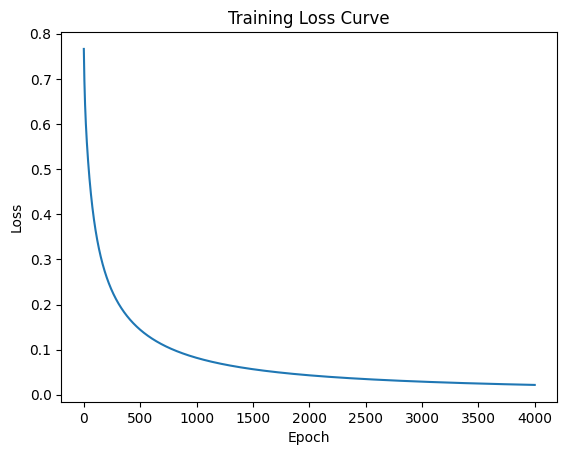

In [10]:
plot_loss(loss_values)

##### 4 Evaluate Your Model

In [11]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)


tensor([[2.4682e-05],
        [2.5276e-02],
        [2.5276e-02],
        [9.6459e-01]], grad_fn=<SigmoidBackward0>)


#### 5 Make necessary adjustments
In this case we don't understand exactly what e-01 e-02 values mean so we decide on a threshold and we 

In [12]:
output = (test_output > 0.5).float()

In [13]:
print(output)

tensor([[0.],
        [0.],
        [0.],
        [1.]])


##### 6 Save the Model

In [14]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_perceptron.pth


## Deep Dive Classification problems

## Architecture of a classification neural network
Courtesy of https://www.learnpytorch.io/01_pytorch_workflow/

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to gets hands-on with this setup throughout this notebook.

## We provided an accuracy function to be on the same boat with everyone

In [15]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

## Let's Make our own circles dataset


### 1 Data

In [16]:
from sklearn.datasets import make_circles


# Make 2000 samples 
n_samples = 3000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.15, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [17]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [18]:
print(f"Last 5 X features:\n{X[5:]}") #Wink wink numpy slicing
print(f"\Last 5 y labels:\n{y[5:]}")

Last 5 X features:
tensor([[ 0.0476, -0.8667],
        [ 1.0818, -0.0557],
        [-0.5864,  0.7695],
        ...,
        [-0.1066, -1.0471],
        [ 0.8323, -0.8111],
        [-0.7385, -0.3467]])
\Last 5 y labels:
tensor([0., 0., 1.,  ..., 0., 0., 0.])


### Vizualize the dataset
Extra : Vary the noise to observe different dataset generation

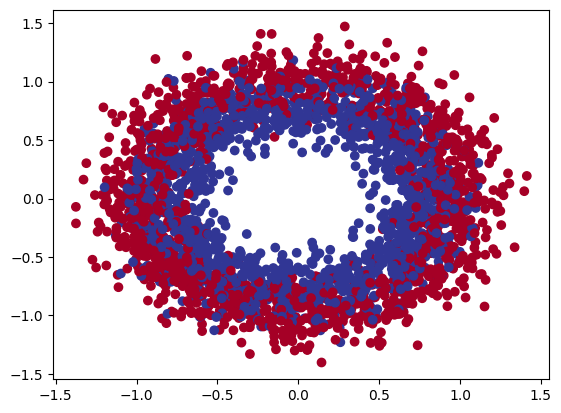

In [19]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

Ex 1

Analyse the data: print the shape of our toy dataset

What's the second dimension on X?

Print some values of the toy dataset


In [20]:
print(f"Feature shape: {X.shape}")
print(f"Label shape: {y.shape}\n")

print(f"Second dimension of X (the xOy coordinates of the dots): {X.shape[1]}\n")

print(f"First 10 feature values:\n{X[:10]}")
print(f"First 10 label values:\n{y[:10]}")

Feature shape: torch.Size([3000, 2])
Label shape: torch.Size([3000])

Second dimension of X (the xOy coordinates of the dots): 2

First 10 feature values:
tensor([[ 0.0470,  0.6750],
        [ 0.1261, -1.0087],
        [ 0.3886,  0.7199],
        [ 0.4397,  0.8657],
        [-0.4462, -0.7112],
        [ 0.0476, -0.8667],
        [ 1.0818, -0.0557],
        [-0.5864,  0.7695],
        [-0.2543,  1.3042],
        [-0.2103, -0.8275]])
First 10 label values:
tensor([1., 0., 1., 0., 1., 0., 0., 1., 0., 1.])


Ex 2 :

In the next step, we need to prepare the data to be compatible with PyTorch and for modelling. To achieve this, we have two tasks to complete:

Convert our data from NumPy arrays to PyTorch tensors as PyTorch works more efficiently with tensors.
Create a split between the training and testing sets. The model is trained on the training set to learn the relationships between X and y. Afterward, the model's learned patterns are evaluated on the test dataset.

In [21]:
from sklearn.model_selection import train_test_split

y = y.unsqueeze(1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

### 2 Baseline (Dumb) Model

Ex 3 Build a model similar to the perceptron with 2 linear layers (no activation function)
Please be mindfull of your model names (distinct names)
If capable move your model to the gpu

In [22]:
class CirclePerceptron(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(CirclePerceptron, self).__init__()
        # Takes in {input_dim}  features (X), produces {output_dim} features in two layers
        self.hidden = torch.nn.Linear(input_dim, hidden_dim)
        self.linear = torch.nn.Linear(hidden_dim, output_dim) 
        
    def forward(self, x):
        # Takes in the computation through the linear layers and the resulting features
        x = self.linear(self.hidden(x)) 
        return x

In [23]:
# Create model
model_circle = CirclePerceptron(2, 5, output_dim=1)

# Move model to GPU
if torch.cuda.is_available():
    model_circle.to('cuda')

#### Equivalent of the circle model using nn sequential

In [24]:
# model_circle = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_circle

### 2.1 Setup loss function and optimizer

For a binary classification problem you'll often use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, so can too the Adam optimizer (`torch.optim.Adam()`). 

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Mutli-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*Table of various loss functions and optimizers, there are more but these some common ones you'll see.*

Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

> **Note:** Recall a **loss function** is what measures how *wrong* your model predictions are, the higher the loss, the worse your model.


Therefore, torch.nn.BCEWithLogitsLoss() is recommended for binary classification tasks. However, for more advanced usage, one may choose to separate the nn.Sigmoid and torch.nn.BCELoss() components, though that is beyond the scope of this notebook. We will now create a loss function and an optimizer.





For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

In [25]:
# Ex 4 Create the recommended loss_fn and optimizer

In [26]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.1)

In [27]:
# 3 Evaluate Model

In [218]:
from utils import plot_decision_boundary

In [29]:
test_output = model_circle(X)
print(test_output)

tensor([[0.7242],
        [0.3049],
        [0.7263],
        ...,
        [0.3015],
        [0.3352],
        [0.4918]], grad_fn=<AddmmBackward0>)


### 2.2 Training Loop

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>



In [30]:
# Ex 5 Build the training loop
# Every 10 epochs rint the loss and the accuracy and save them in a loss_curve, acc_curve
# Also plot them

In [31]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [32]:
num_epochs = 4000
loss_values = []
acc_values = []
loss_values = []
for epoch in range(num_epochs):
    y_pred = model_circle(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save the loss and accuracy values every 10 epochs
    if (epoch + 1) % 10 == 0:
        loss_values.append(loss.item()) # This is so that we can look at an image of our loss
        acc_values.append(accuracy_fn(y_train, y_pred))
    
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.6929
Epoch [200/4000], Loss: 0.6926
Epoch [300/4000], Loss: 0.6925
Epoch [400/4000], Loss: 0.6925
Epoch [500/4000], Loss: 0.6925
Epoch [600/4000], Loss: 0.6925
Epoch [700/4000], Loss: 0.6925
Epoch [800/4000], Loss: 0.6925
Epoch [900/4000], Loss: 0.6925
Epoch [1000/4000], Loss: 0.6925
Epoch [1100/4000], Loss: 0.6925
Epoch [1200/4000], Loss: 0.6925
Epoch [1300/4000], Loss: 0.6925
Epoch [1400/4000], Loss: 0.6925
Epoch [1500/4000], Loss: 0.6925
Epoch [1600/4000], Loss: 0.6925
Epoch [1700/4000], Loss: 0.6925
Epoch [1800/4000], Loss: 0.6925
Epoch [1900/4000], Loss: 0.6925
Epoch [2000/4000], Loss: 0.6925
Epoch [2100/4000], Loss: 0.6925
Epoch [2200/4000], Loss: 0.6925
Epoch [2300/4000], Loss: 0.6925
Epoch [2400/4000], Loss: 0.6925
Epoch [2500/4000], Loss: 0.6925
Epoch [2600/4000], Loss: 0.6925
Epoch [2700/4000], Loss: 0.6925
Epoch [2800/4000], Loss: 0.6925
Epoch [2900/4000], Loss: 0.6925
Epoch [3000/4000], Loss: 0.6925
Epoch [3100/4000], Loss: 0.6925
Epoch [3200/4000]

In [33]:
from typing import List

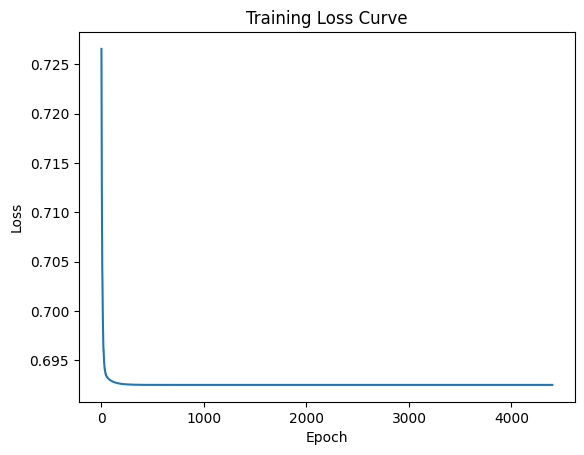

In [34]:
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()
    
plot_loss(loss_values)

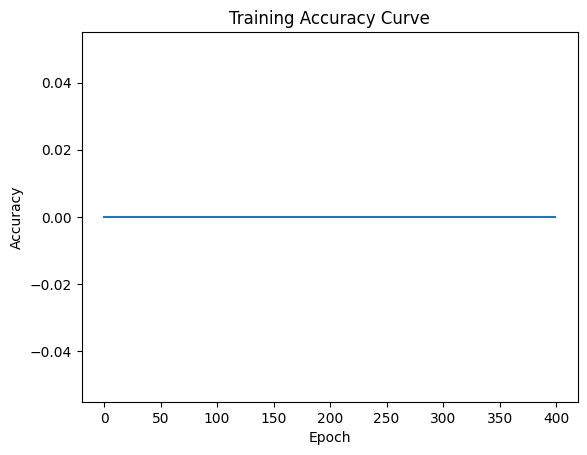

In [35]:
def plot_acc(acc_values: List[float]):
    plt.plot(acc_values)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy Curve')
    plt.show()
    
plot_acc(acc_values)

### 3 Evaluate plots

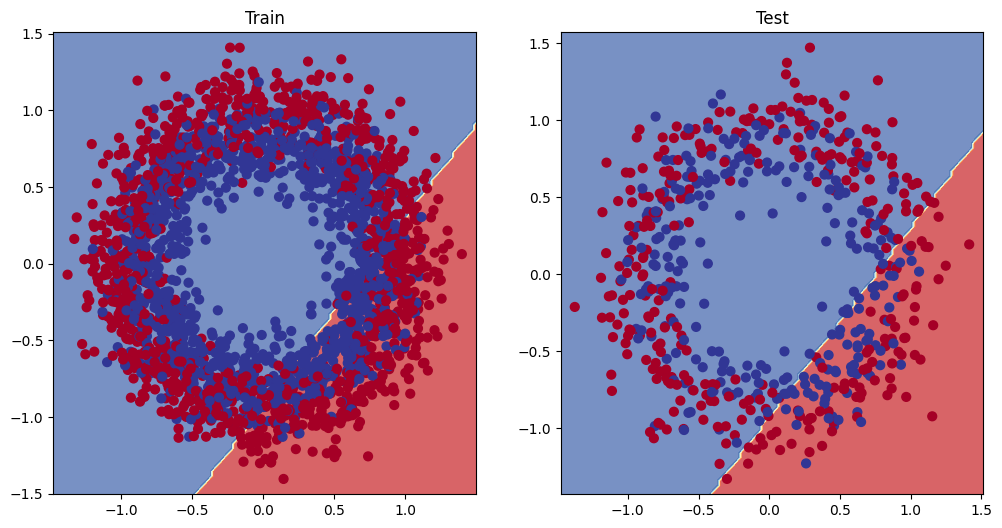

In [36]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

It can be observed that the model's capability is limited to splitting the data into two parts, which is due to its linearity. This fact accounts for the 50% accuracy rate, as our circular data can only be cut in half by a straight line at best.

In machine learning terminology, we say that our model is underfitting, indicating that it is unable to learn the predictive patterns from the data.

What are some ways to enhance the model's performance?

## How can we improve a model? 


| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |

#### Even if we add more layers/ change activation the proposed first model is still liniar
#### Extra excercise (Not mandatory) build a circle_02 model with said improvements

## Introduce non-liniarity in the model
hat do you think will happen when we introduce the capability for our model to use **non-linear actviation functions**?

Well let's see.

PyTorch has a bunch of [ready-made non-linear activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) that do similiar but different things. 

One of the most common and best performing is [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).

Rather than talk about it, let's put it in our neural network between the hidden layers in the forward pass and see what happens.

In [37]:
# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
input_dummy

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [38]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(input_dummy)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

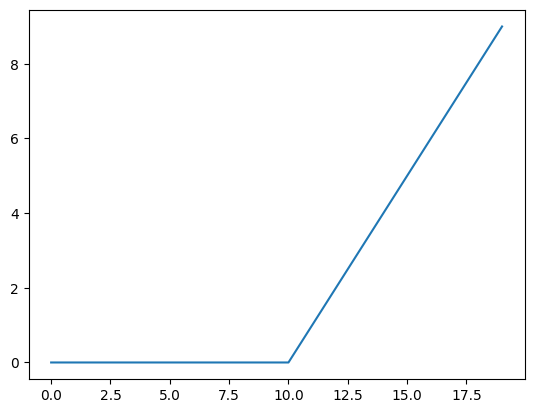

In [39]:
plt.plot(relu(input_dummy))

In [40]:
# Ex 6 Recreate the model with some none linear activation functions

In [139]:
class NonlinearCirclePerceptron(torch.nn.Module):
    def __init__(self, input_dim, hidden1_dim, hidden2_dim, output_dim):
        super(NonlinearCirclePerceptron, self).__init__()
        self.hidden1 = torch.nn.Linear(input_dim, hidden1_dim)
        self.hidden2 = torch.nn.Linear(hidden1_dim, hidden2_dim)
        self.output = torch.nn.Linear(hidden2_dim, output_dim)
        self.activation1 = torch.nn.ReLU()
        self.activation2 = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.activation1(x)
        x = self.hidden2(x)
        x = self.activation2(x)
        x = self.output(x)
        
        return x
    
model_circle_nonlinear = NonlinearCirclePerceptron(2, 16, 16, 1)

In [140]:
# Ex 7 Recreate the optimizer and training loop

In [141]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_circle_nonlinear.parameters(), lr=0.1)

In [142]:
num_epochs = 4000
loss_values = []
acc_values = []
for epoch in range(num_epochs):
    y_pred = model_circle_nonlinear(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        loss_values.append(loss.item()) # This is so that we can look at an image of our loss
        acc_values.append(accuracy_fn(y_train, y_pred))
    
    # Print the loss every 1000 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.6889
Epoch [200/4000], Loss: 0.6852
Epoch [300/4000], Loss: 0.6819
Epoch [400/4000], Loss: 0.6777
Epoch [500/4000], Loss: 0.6714
Epoch [600/4000], Loss: 0.6618
Epoch [700/4000], Loss: 0.6470
Epoch [800/4000], Loss: 0.6235
Epoch [900/4000], Loss: 0.5919
Epoch [1000/4000], Loss: 0.5580
Epoch [1100/4000], Loss: 0.5324
Epoch [1200/4000], Loss: 0.5175
Epoch [1300/4000], Loss: 0.5112
Epoch [1400/4000], Loss: 0.5085
Epoch [1500/4000], Loss: 0.5073
Epoch [1600/4000], Loss: 0.5068
Epoch [1700/4000], Loss: 0.5064
Epoch [1800/4000], Loss: 0.5060
Epoch [1900/4000], Loss: 0.5057
Epoch [2000/4000], Loss: 0.5055
Epoch [2100/4000], Loss: 0.5054
Epoch [2200/4000], Loss: 0.5053
Epoch [2300/4000], Loss: 0.5052
Epoch [2400/4000], Loss: 0.5051
Epoch [2500/4000], Loss: 0.5050
Epoch [2600/4000], Loss: 0.5050
Epoch [2700/4000], Loss: 0.5049
Epoch [2800/4000], Loss: 0.5048
Epoch [2900/4000], Loss: 0.5048
Epoch [3000/4000], Loss: 0.5047
Epoch [3100/4000], Loss: 0.5047
Epoch [3200/4000]

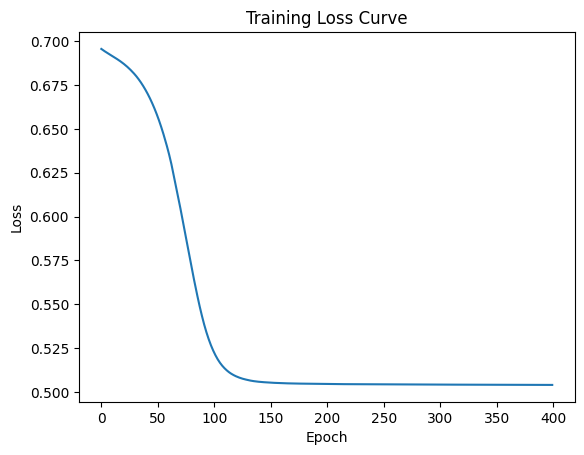

In [45]:
plot_loss(loss_values)

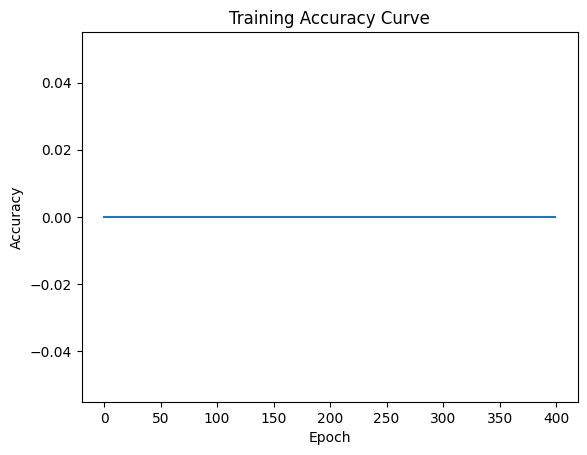

In [46]:
plot_acc(acc_values)

In [47]:
# Ex 8 Evaluate vizual

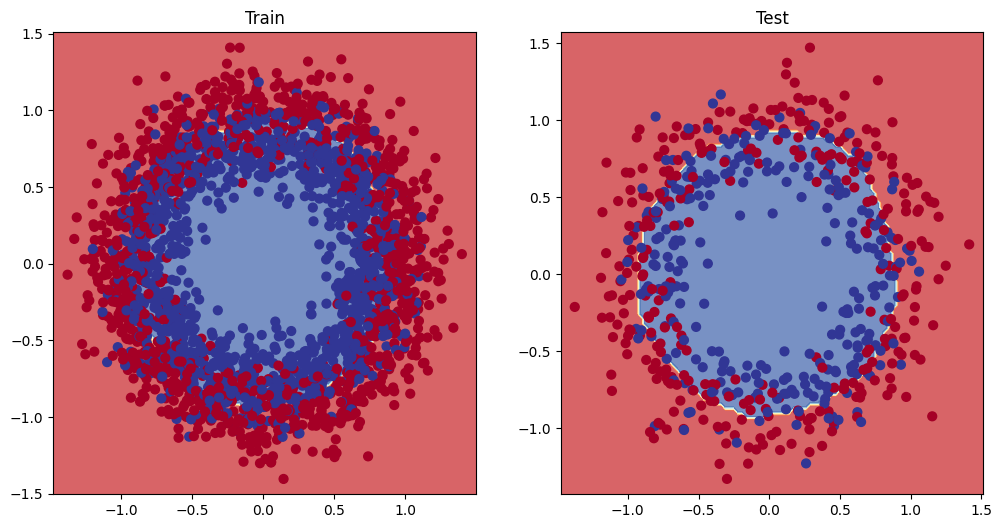

In [92]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle_nonlinear, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle_nonlinear, X_test, y_test)

# Harder classification


tensor([[-0.0515,  0.4442],
        [ 1.0320, -0.4197],
        [ 0.8679, -0.2548],
        [ 0.2889, -0.4487],
        [-0.8334,  0.5351]]) tensor([1., 1., 1., 1., 0.])


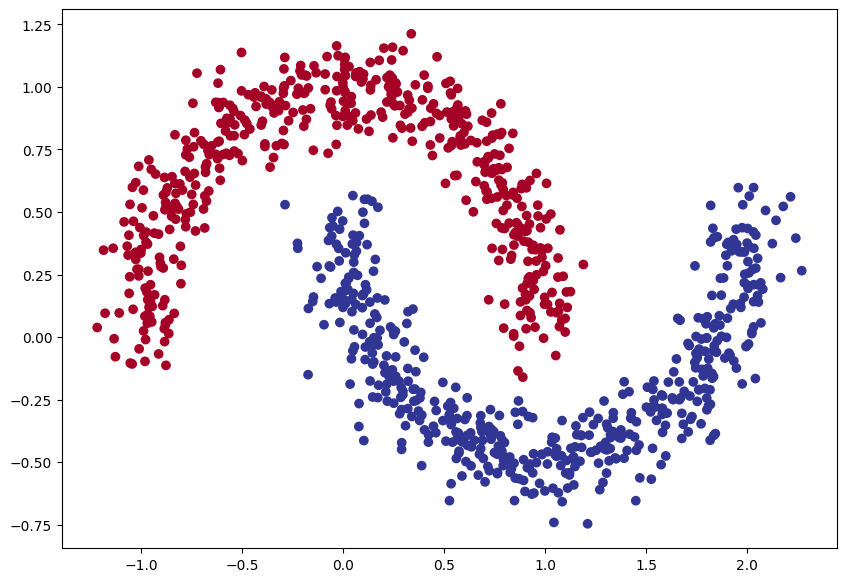

In [184]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
RANDOM_SEED = 42

# 1. Create multi-class data using make_moons
X_blob, y_blob = make_moons(n_samples=1000,
    noise=0.1, # added noise parameter instead of cluster_std
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.FloatTensor)
print(X_blob[:5], y_blob[:5])

y_blob = y_blob.unsqueeze(1)

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)


# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
plt.show()

In [185]:
# Ex 9 Make a classfier for this dataset

In [186]:
class MoonPerceptron(torch.nn.Module):
    def __init__(self, input_dim, hidden1_dim, hidden2_dim, output_dim):
        super(MoonPerceptron, self).__init__()
        self.hidden1 = torch.nn.Linear(input_dim, hidden1_dim)
        self.hidden2 = torch.nn.Linear(hidden1_dim, hidden2_dim)
        self.output = torch.nn.Linear(hidden2_dim, output_dim)
        self.activation1 = torch.nn.Tanh()
        self.activation2 = torch.nn.Tanh()
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.activation1(x)
        x = self.hidden2(x)
        x = self.activation2(x)
        x = self.output(x)
        
        return x
    
model_blob = MoonPerceptron(2, 64, 64, 1)

In [187]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_blob.parameters(), lr=0.1)

In [188]:
num_epochs = 4000
loss_values = []
acc_values = []
for epoch in range(num_epochs):
    y_pred = model_blob(X_blob_train)
    loss = criterion(y_pred, y_blob_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        loss_values.append(loss.item()) # This is so that we can look at an image of our loss
        acc_values.append(accuracy_fn(y_blob_train, y_pred))
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.2651
Epoch [200/4000], Loss: 0.2505
Epoch [300/4000], Loss: 0.2401
Epoch [400/4000], Loss: 0.2228
Epoch [500/4000], Loss: 0.1905
Epoch [600/4000], Loss: 0.1418
Epoch [700/4000], Loss: 0.0961
Epoch [800/4000], Loss: 0.0653
Epoch [900/4000], Loss: 0.0468
Epoch [1000/4000], Loss: 0.0355
Epoch [1100/4000], Loss: 0.0282
Epoch [1200/4000], Loss: 0.0233
Epoch [1300/4000], Loss: 0.0198
Epoch [1400/4000], Loss: 0.0172
Epoch [1500/4000], Loss: 0.0152
Epoch [1600/4000], Loss: 0.0136
Epoch [1700/4000], Loss: 0.0123
Epoch [1800/4000], Loss: 0.0113
Epoch [1900/4000], Loss: 0.0104
Epoch [2000/4000], Loss: 0.0096
Epoch [2100/4000], Loss: 0.0090
Epoch [2200/4000], Loss: 0.0085
Epoch [2300/4000], Loss: 0.0080
Epoch [2400/4000], Loss: 0.0075
Epoch [2500/4000], Loss: 0.0072
Epoch [2600/4000], Loss: 0.0068
Epoch [2700/4000], Loss: 0.0065
Epoch [2800/4000], Loss: 0.0062
Epoch [2900/4000], Loss: 0.0060
Epoch [3000/4000], Loss: 0.0058
Epoch [3100/4000], Loss: 0.0055
Epoch [3200/4000]

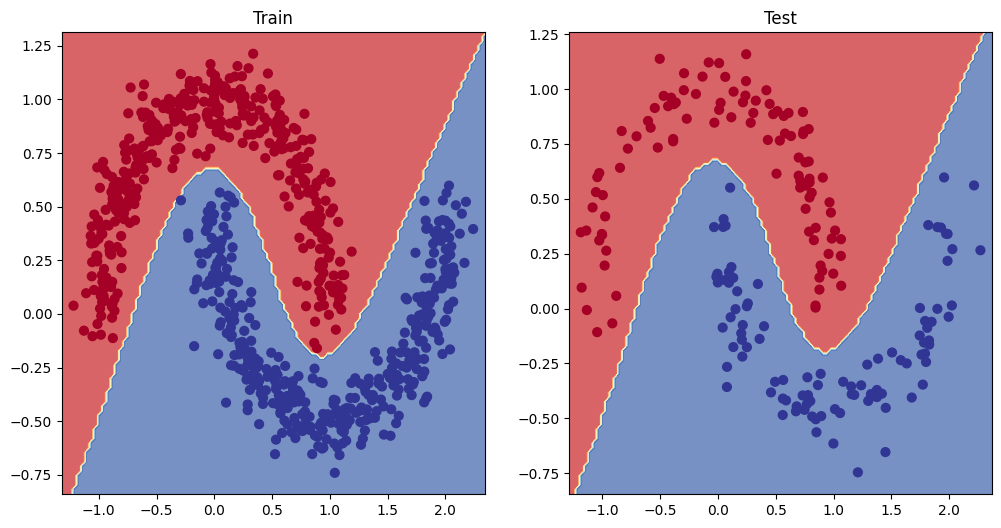

In [189]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_blob, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_blob, X_blob_test, y_blob_test)

## Multiclass classification
We will create a dataset using make blobs method. The centers are the number of classes we are targeting in this case 4. In our final model the number of clusters is the number of output features for our final layer 
nn.Linear(in_features=hidden_units, out_features=4)

In [223]:
# 1. Create multi-class data using make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, y_multi = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [224]:
# 2. Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y_multi = torch.from_numpy(y_multi).type(torch.LongTensor)

In [225]:
# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=RANDOM_SEED)

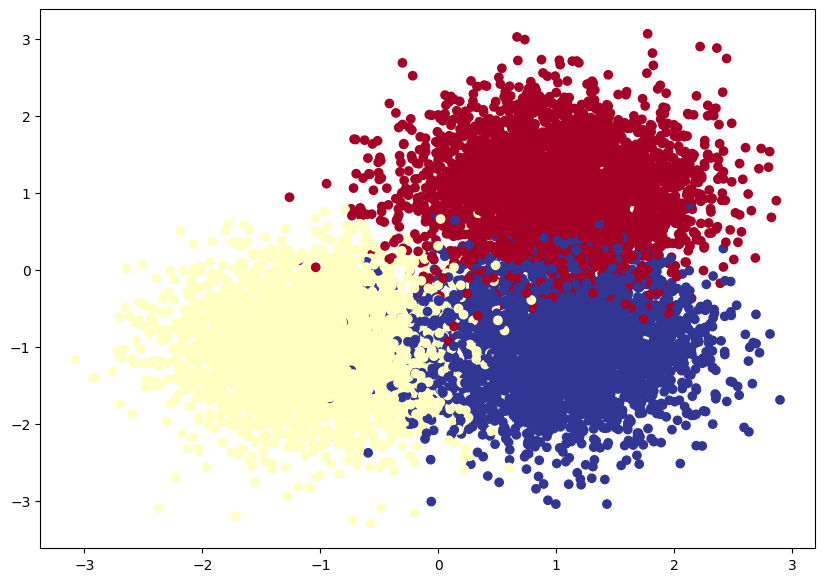

In [226]:
# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_multi, cmap=plt.cm.RdYlBu)
plt.show()

In [227]:
class MultiPerceptron(torch.nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(MultiPerceptron, self).__init__()
        self.hidden = torch.nn.Linear(input_dim, hidden_units)
        self.output = torch.nn.Linear(hidden_units, 4)
        
    def forward(self, x):
        x = self.hidden(x)
        x = torch.relu(x)
        x = self.output(x)
        
        return x
    
model_multi = MultiPerceptron(2, 64)

In [228]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_multi.parameters(), lr=0.1)

In [229]:
num_epochs = 1000
loss_values = []
for epoch in range(num_epochs):
    y_pred = model_multi(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        loss_values.append(loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.1899
Epoch [200/1000], Loss: 0.1759
Epoch [300/1000], Loss: 0.1727
Epoch [400/1000], Loss: 0.1716
Epoch [500/1000], Loss: 0.1711
Epoch [600/1000], Loss: 0.1709
Epoch [700/1000], Loss: 0.1707
Epoch [800/1000], Loss: 0.1705
Epoch [900/1000], Loss: 0.1704
Epoch [1000/1000], Loss: 0.1703


In [230]:
with torch.no_grad():
    y_pred_train = model_multi(X_train)
    y_pred_test = model_multi(X_test)
    train_acc = (torch.argmax(y_pred_train, dim=1) == y_train).float().mean()
    test_acc = (torch.argmax(y_pred_test, dim=1) == y_test).float().mean()
    print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

Train Accuracy: 0.9346, Test Accuracy: 0.9395


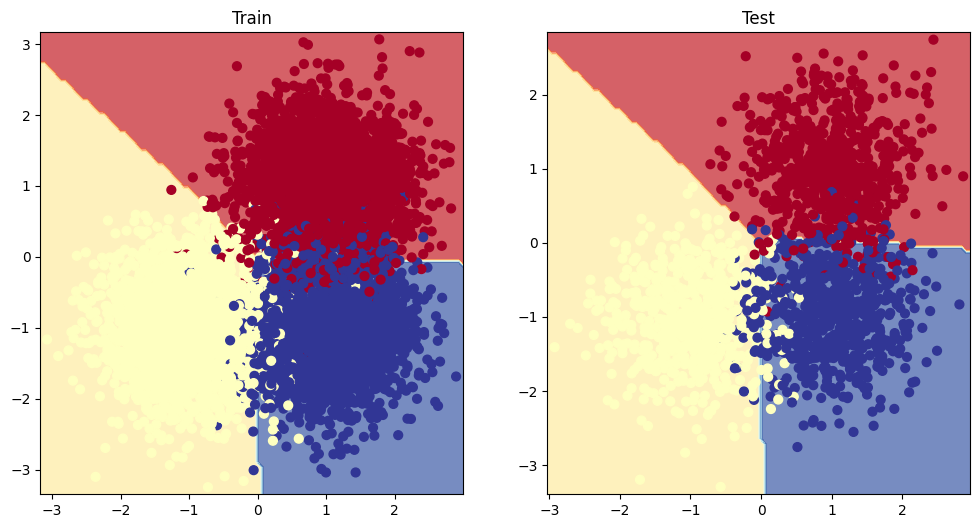

In [231]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_multi, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_multi, X_test, y_test)

# Further Reading
## Deep Learning
https://www.youtube.com/watch?v=7sB052Pz0sQ
## Torch
* https://pytorch.org/tutorials/beginner/nn_tutorial.html
## Gradients& Linear Algebra
* https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21